# COVID-19

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from joblib import Parallel, delayed
import multiprocessing
from datetime import datetime
import matplotlib.pyplot as plt

### Data Exploration

In [ ]:
# set the connection to your database

conn = '{program}://{user}:{password}@{ip}:{port}/{database}'.format(
       program="postgresql",
       user="*****",
       password="*****",
       ip="127.0.0.1",
       port="5432",
       database="tweets")
engine = create_engine(conn)



In [ ]:
#query the data you are interested in

q = "SELECT * FROM status WHERE meta_id IN (9)"

data = pd.read_sql_query(sql=q, con=engine, )

data.head()

In [ ]:
data.to_csv("~/Documents/twitter/Clean using Gephi/covid_data_raw.csv")

In [ ]:
data.shape

In [ ]:
list(data.columns)

In [ ]:
data.user_location.value_counts()

In [ ]:
data.target_long_text

In [ ]:
data.target_long_text.iloc[2]

In [ ]:
data.lang.value_counts()

In [ ]:
data.type

### Graph

In [ ]:
grafocovid = data[data.type== "Retweet"][["user_screen_name", "target_user_screen_name"]]

In [ ]:
grafocovid = grafocovid.rename(index = str, columns = {"user_screen_name" : "source", "target_user_screen_name" : "target"})

In [ ]:
grafocovid.shape

In [ ]:
grafocovid.to_csv("~/Documents/twitter/Clean using Gephi/datos_grafocovid.csv", index = False)

In [ ]:
dfmodul = pd.read_csv("~/Documents/twitter/Clean using Gephi/covid_modularity.csv")

In [ ]:
dfmodul.columns

In [ ]:
dfmodul.Id.dtype

In [ ]:
dfmodul.shape

In [ ]:
data.id.dtype


# Communities

In [ ]:
rts = data[data.type == 'Retweet']
rts.shape()

In [ ]:
rts.shape

In [ ]:
coms = pd.merge(dfmodul, rts, how = "inner", left_on = "Id", right_on = "user_screen_name")

In [ ]:
coms.head(10)

In [ ]:
coms.shape

In [ ]:
coms = coms.dropna( axis = 1, how = "all")

In [ ]:
coms.meta_id.isnull().value_counts()

In [ ]:
coms.id.isnull().value_counts()

In [ ]:
coms.modularity_class.isnull().value_counts()

### Largest community

In [ ]:
com1 = coms[coms.modularity_class == 235]

In [ ]:
com1.dropna(axis =1, how = "all", inplace = True)

In [ ]:
com1.shape

In [ ]:
com1.dropna(axis = 0, subset = ['target_long_text'], inplace = True)

In [ ]:
com1.text.iloc[1]

In [ ]:
com1.target_long_text.iloc[1]

In [ ]:
str(com1.target_long_text.iloc[0])

In [ ]:
com1['target_long_text'] = com1['target_long_text'].astype(str)

In [ ]:
com1.target_long_text.dtype

In [ ]:
com1.target_long_text.notnull().sum()

In [ ]:
list(com1.target_long_text)

In [ ]:
com1.reset_index(inplace = True)

In [ ]:
#com1.to_csv("~/Documents/twitter/Clean using Gephi/comunity1_tmp.csv", index = False)

In [3]:
#com1 = pd.read_csv("~/Documents/twitter/Clean using Gephi/comunity1_tmp.csv")

# VADER

In [5]:
import nltk

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/estebanvillaturek/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
com1text = list(com1.target_long_text[com1.target_long_text.notnull()== True])

In [16]:
com1.dropna(axis = 0, subset = ['target_long_text'], inplace = True) 

In [12]:
next(com1.target_long_text.items())

(0,
 'A serious WH coronavirus update would include:\n- number of tests conducted\n- number of current cases\n- number of new cases\n- number of total deaths\n- number of new deaths\n- current mortality rate\n- number of people recovered\n- vaccine research update\n- treatment update')

In [29]:
analyzer = SIA()



In [70]:
first = com1[['target_long_text']]

first = first.rename(columns={'target_long_text' : 'text'})

first.columns

Index(['text'], dtype='object')

In [71]:
first.text.dtype

dtype('O')

In [72]:
first.text.apply(str)

first.text.dtype

dtype('O')

In [78]:
first.text[1]

'We are in the middle of a health care emergency. It’s time for Senators from both parties to come together &amp; do our jobs. We should pass the #FamiliesFirst Coronavirus Response Act tonight. We were sent here to act -- let’s do it. https://t.co/DUsza9Pjsh'

In [120]:
first['scores'] = ''

In [128]:
first['scores'] = first.text.apply(lambda x: analyzer.polarity_scores(x))

In [129]:
first.head()

,text,scores
0,A serious WH coronavirus update would include:...,"{'neg': 0.032, 'neu': 0.773, 'pos': 0.195, 'co..."
1,We are in the middle of a health care emergenc...,"{'neg': 0.054, 'neu': 0.825, 'pos': 0.122, 'co..."
2,Jared Kushner is not qualified to be working i...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp..."
3,"Bay Area scientists, we are in need of Bio-Rad...","{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'comp..."
4,Gizmodo: “Assholes Who Ridiculed Preparations ...,"{'neg': 0.097, 'neu': 0.739, 'pos': 0.163, 'co..."


In [132]:
first[['negative', 'neutral', 'positive', 'compund']] = first.scores.apply(pd.Series)

In [134]:
first.head()

,text,scores,negative,neutral,positive,compund
0,A serious WH coronavirus update would include:...,"{'neg': 0.032, 'neu': 0.773, 'pos': 0.195, 'co...",0.032,0.773,0.195,0.3612
1,We are in the middle of a health care emergenc...,"{'neg': 0.054, 'neu': 0.825, 'pos': 0.122, 'co...",0.054,0.825,0.122,0.5106
2,Jared Kushner is not qualified to be working i...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.000,0.944,0.056,0.3612
3,"Bay Area scientists, we are in need of Bio-Rad...","{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'comp...",0.000,0.954,0.046,0.3182
4,Gizmodo: “Assholes Who Ridiculed Preparations ...,"{'neg': 0.097, 'neu': 0.739, 'pos': 0.163, 'co...",0.097,0.739,0.163,0.4019


In [138]:
first.drop('scores', axis = 1, inplace = True)

In [139]:
first.head()

,text,negative,neutral,positive,compund
0,A serious WH coronavirus update would include:...,0.032,0.773,0.195,0.3612
1,We are in the middle of a health care emergenc...,0.054,0.825,0.122,0.5106
2,Jared Kushner is not qualified to be working i...,0.000,0.944,0.056,0.3612
3,"Bay Area scientists, we are in need of Bio-Rad...",0.000,0.954,0.046,0.3182
4,Gizmodo: “Assholes Who Ridiculed Preparations ...,0.097,0.739,0.163,0.4019


# Latent Dirichlect Allocation - LDA

In [141]:

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [142]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/estebanvillaturek/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [387]:
first['text'] = first.text.apply(lambda x: re.sub(r"http\S+", "", str(x)))

In [143]:
# Lemmatizer function

def lemmatize(text):
    """
    Returns lemmatized text input.
    """
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos = 'v'))

In [145]:
# preprocessing function

def preprocess(text):
    preprocessed = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            preprocessed.append(lemmatize(token))
    return preprocessed


In [389]:
# process the tweets

stemmer = SnowballStemmer('english')

first['processed_tweets'] = first.text.map(preprocess)

In [390]:
print(first.processed_tweets[1])

['middl', 'health', 'care', 'emerg', 'time', 'senat', 'parti', 'come', 'amp', 'job', 'pass', 'familiesfirst', 'coronavirus', 'respons', 'act', 'tonight', 'send', 'act', 'let']


In [388]:
print(first.text[1])

We are in the middle of a health care emergency. It’s time for Senators from both parties to come together &amp; do our jobs. We should pass the #FamiliesFirst Coronavirus Response Act tonight. We were sent here to act -- let’s do it. 


In [391]:
# create a generic dictionary of the words and frequecnies present in the corpus

dictionary = gensim.corpora.Dictionary(first.processed_tweets)

In [392]:
# remove the extreme terms, appearing either too many times, as well as too few, and keep the most frequent 100k terms using gensim

dictionary.filter_extremes(no_below = 50, no_above = 0.5, keep_n = 100000)

In [393]:
# create the corpus using gensim's doc2bow

corpus = [dictionary.doc2bow(doc) for doc in first.processed_tweets]

In [394]:
corpus[0]

[(0, 2),
 (1, 1),
 (2, 2),
 (3, 2),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 6),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 3),
 (16, 1),
 (17, 1)]

In [395]:
# repeat using TF-IDF

from gensim import corpora, models

tfidf = models.TfidfModel(corpus)

In [396]:
tfidf_corpus = tfidf[corpus]

In [397]:
tfidf_corpus[0]

[(0, 0.16782115777488704),
 (1, 0.14766514209050077),
 (2, 0.26299174222470284),
 (3, 0.17679222417920876),
 (4, 0.11490289803721834),
 (5, 0.14556839847040248),
 (6, 0.16761770632408104),
 (7, 0.7308952273144536),
 (8, 0.0615803202410288),
 (9, 0.10375853037980863),
 (10, 0.14399579114845942),
 (11, 0.1352312951984055),
 (12, 0.057861942950912904),
 (13, 0.12676906526498768),
 (14, 0.13651406804136348),
 (15, 0.35218090946969816),
 (16, 0.11202616108975585),
 (17, 0.15715772328138788)]

In [398]:
# run parallelized LDA using Tf-IDF

%timeit
ldamodel = gensim.models.LdaMulticore(tfidf_corpus, num_topics = 10, id2word = dictionary, passes = 10, workers = 4)

In [399]:
# show present topics

for id, topic in ldamodel.print_topics(-1):
    print('Topic: {}\nWord: {}\n'.format(id, topic))

Topic: 0
Word: 0.016*"virus" + 0.014*"make" + 0.014*"chines" + 0.014*"racism" + 0.013*"call" + 0.013*"nation" + 0.013*"afraid" + 0.013*"troubl" + 0.013*"hate" + 0.013*"deep"

Topic: 1
Word: 0.041*"genius" + 0.039*"tell" + 0.037*"worri" + 0.020*"climatechang" + 0.020*"rememb" + 0.020*"amp" + 0.019*"social" + 0.018*"care" + 0.018*"deserv" + 0.018*"tri"

Topic: 2
Word: 0.010*"covid" + 0.008*"test" + 0.008*"agre" + 0.007*"think" + 0.007*"help" + 0.006*"kit" + 0.006*"virus" + 0.006*"visit" + 0.006*"asshol" + 0.005*"symptom"

Topic: 3
Word: 0.006*"peopl" + 0.006*"novel" + 0.005*"donat" + 0.005*"protect" + 0.005*"trump" + 0.005*"close" + 0.005*"school" + 0.005*"help" + 0.005*"covid" + 0.005*"countri"

Topic: 4
Word: 0.016*"health" + 0.013*"team" + 0.012*"countri" + 0.011*"trump" + 0.011*"pandem" + 0.010*"staff" + 0.009*"test" + 0.009*"talk" + 0.008*"ad" + 0.008*"mcgrath"

Topic: 5
Word: 0.020*"test" + 0.018*"rate" + 0.017*"ship" + 0.017*"berlin" + 0.016*"start" + 0.016*"treat" + 0.016*"creat"

In [400]:
# Assessing classifications 

for index, score in sorted(ldamodel[tfidf_corpus[0]], key = lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, ldamodel.print_topic(index, 5)))


Score: 0.7907378077507019	 
Topic: 0.019*"case" + 0.018*"mile" + 0.016*"new" + 0.013*"fight" + 0.012*"number"

Score: 0.023255078122019768	 
Topic: 0.020*"test" + 0.018*"rate" + 0.017*"ship" + 0.017*"berlin" + 0.016*"start"

Score: 0.023251419886946678	 
Topic: 0.017*"covid" + 0.009*"virus" + 0.008*"trump" + 0.007*"health" + 0.007*"month"

Score: 0.023251280188560486	 
Topic: 0.010*"covid" + 0.008*"test" + 0.008*"agre" + 0.007*"think" + 0.007*"help"

Score: 0.023251252248883247	 
Topic: 0.014*"uk" + 0.013*"strategi" + 0.008*"death" + 0.008*"result" + 0.007*"gov"

Score: 0.0232511218637228	 
Topic: 0.016*"virus" + 0.014*"make" + 0.014*"chines" + 0.014*"racism" + 0.013*"call"

Score: 0.023250965401530266	 
Topic: 0.006*"peopl" + 0.006*"novel" + 0.005*"donat" + 0.005*"protect" + 0.005*"trump"

Score: 0.023250723257660866	 
Topic: 0.020*"need" + 0.018*"mitch" + 0.013*"packag" + 0.013*"vote" + 0.013*"crisi"

Score: 0.023250678554177284	 
Topic: 0.016*"health" + 0.013*"team" + 0.012*"countr

In [401]:
# assign to 'first' in a new column

first['topics'] = ''

first.topics = [max(p, key = lambda item: item[1]) for p in ldamodel[tfidf_corpus]]

In [402]:
first.rename(columns = {'compund' : 'compound'}, inplace = True)

In [403]:
first.head()

,text,negative,neutral,positive,compound,processed_tweets,topics,topic_id,topic_score
0,A serious WH coronavirus update would include:...,0.032,0.773,0.195,0.3612,"[wh, coronavirus, updat, includ, number, test,...","(7, 0.79073775)",8.0,0.790725
1,We are in the middle of a health care emergenc...,0.054,0.825,0.122,0.5106,"[middl, health, care, emerg, time, senat, part...","(0, 0.81547374)",0.0,0.822864
2,Jared Kushner is not qualified to be working i...,0.000,0.944,0.056,0.3612,"[jar, kushner, qualifi, work, white, hous, fac...","(7, 0.80265355)",5.0,0.813589
3,"Bay Area scientists, we are in need of Bio-Rad...",0.000,0.954,0.046,0.3182,"[bay, area, scientist, need, bio, rad, cfx, rt...","(6, 0.8396268)",4.0,0.839612
4,Gizmodo: “Assholes Who Ridiculed Preparations ...,0.097,0.739,0.163,0.4019,"[gizmodo, asshol, ridicul, prepar, covid, pand...","(2, 0.49776408)",9.0,0.415576


In [404]:
first[['topic_id', 'topic_score']] = first['topics'].apply(pd.Series)

In [405]:
first.head()

,text,negative,neutral,positive,compound,processed_tweets,topics,topic_id,topic_score
0,A serious WH coronavirus update would include:...,0.032,0.773,0.195,0.3612,"[wh, coronavirus, updat, includ, number, test,...","(7, 0.79073775)",7.0,0.790738
1,We are in the middle of a health care emergenc...,0.054,0.825,0.122,0.5106,"[middl, health, care, emerg, time, senat, part...","(0, 0.81547374)",0.0,0.815474
2,Jared Kushner is not qualified to be working i...,0.000,0.944,0.056,0.3612,"[jar, kushner, qualifi, work, white, hous, fac...","(7, 0.80265355)",7.0,0.802654
3,"Bay Area scientists, we are in need of Bio-Rad...",0.000,0.954,0.046,0.3182,"[bay, area, scientist, need, bio, rad, cfx, rt...","(6, 0.8396268)",6.0,0.839627
4,Gizmodo: “Assholes Who Ridiculed Preparations ...,0.097,0.739,0.163,0.4019,"[gizmodo, asshol, ridicul, prepar, covid, pand...","(2, 0.49776408)",2.0,0.497764


In [406]:
first.shape

(72317, 9)

In [426]:
first.loc[1]

text                We are in the middle of a health care emergenc...
negative                                                        0.054
neutral                                                         0.825
positive                                                        0.122
compound                                                       0.5106
processed_tweets    [middl, health, care, emerg, time, senat, part...
topics                                                (0, 0.81547374)
topic_id                                                            0
topic_score                                                  0.815474
Name: 1, dtype: object

# Representation of findings

In [407]:
negative = first.loc[first['compound'] < -0.05]

In [408]:
negative.shape

(33271, 9)

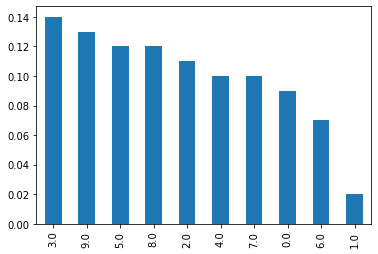

In [409]:
round(negative.topic_id.value_counts()/len(negative), 2).plot(kind = "bar")

In [410]:
print(min(negative.topic_score), max(negative.topic_score))
     

0.21673937141895294 0.8654438257217407


## Positive topics

In [411]:
positive = first.loc[first['compound'] > 0.05]

In [412]:
positive.shape

(29180, 9)

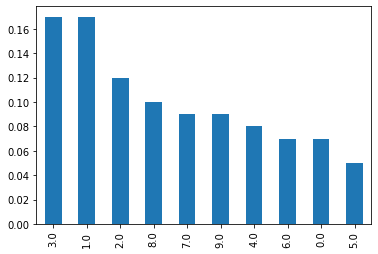

In [413]:
round(positive.topic_id.value_counts()/len(positive), 2).plot(kind = 'bar')

In [414]:
print(min(positive.topic_score), max(positive.topic_score))

0.21296009421348572 0.8502357602119446


## Neutral topics

In [415]:
neutral = first.loc[(first['compound'] > -0.05) & (first['compound'] < 0.05)]

In [416]:
neutral.shape

(9848, 9)

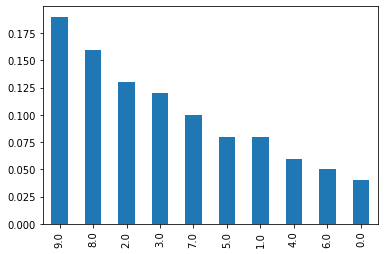

In [417]:
round(neutral.topic_id.value_counts()/len(neutral), 2).plot(kind = 'bar')

In [418]:
print(min(neutral.topic_score), max(neutral.topic_score))

0.10000000149011612 0.845391571521759
